## Procesamiento del Lenguaje Natural 1
### Carrera de Especialización en Inteligencia Artificial - FIUBA

## Desafío N° 3
### Predicción de próxima palabra

### 2º Bimestre 2025

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |


### Objetivo
El objetivo es entrenar un modelo de lenguaje basado en arquitectura de redes recurrentes a partir de un corpus de texto. En el transcurso del ejercicio se explorarán técnicas de generación de secuencias y se medirá la calidad de las mismas calculando la perplejidad. Parte del ejercicio consiste en estructurar adecuadamente el dataset para este problema.

### 0. Librerías

In [1]:
import numpy as np                  # for data manipulation
import pandas as pd                 # for data manipulation
import matplotlib.pyplot as plt     # for data visualization
import os                           # for file operations

import nltk

import tensorflow as tf
from tensorflow import keras

### 1. Dataset

In [2]:
nltk.download("gutenberg")
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\badesia\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
file_ids = gutenberg.fileids()
print("Cantidad de archivos: ", len(file_ids))
print(file_ids)

Cantidad de archivos:  18
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Elegimos trabajar con Hamlet de Shakespeare.

In [4]:
text = gutenberg.raw('shakespeare-hamlet.txt')
with open('hamlet.txt','w') as file:
    file.write(text)               # Guardamos el corpus

In [5]:
text_lower = text.lower()                   # Quitamos las mayúsculas

### 2. Tokenización

Aplicamos el tokenizador de keras para convertir el texto en una secuencia de palabras.

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
total_words=len(tokenizer.word_index) + 1

print("Cantidad de palabras: ", total_words)

Cantidad de palabras:  4818


In [7]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

### 3. Generación de secuencias de n-gramas

Guardamos la secuencia de tokens en el texto. Esto debería ayudar al modelo a entender relaciones entre las palabras.

In [8]:
input_sequences = []
ngram_by_sentence = []
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        ngram_by_sentence.append(len(n_gram_sequence))


In [9]:
input_sequences = []
ngram_by_sentence = []
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    if len(token_list) > 0:
        input_sequences.append(token_list)
        ngram_by_sentence.append(len(token_list))

In [10]:
input_sequences[:5]

[[1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889, 1890, 1891],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182, 63],
 [408, 162, 377, 21, 247, 882]]

In [11]:
ngram_by_sentence[:5]

[8, 4, 6, 3, 6]

In [12]:
max_sequence_length=max([len(x) for x in input_sequences])
print('La máxima secuencia de tokens en el texto es: ', max_sequence_length)

La máxima secuencia de tokens en el texto es:  14


Veamos su histograma de distribución

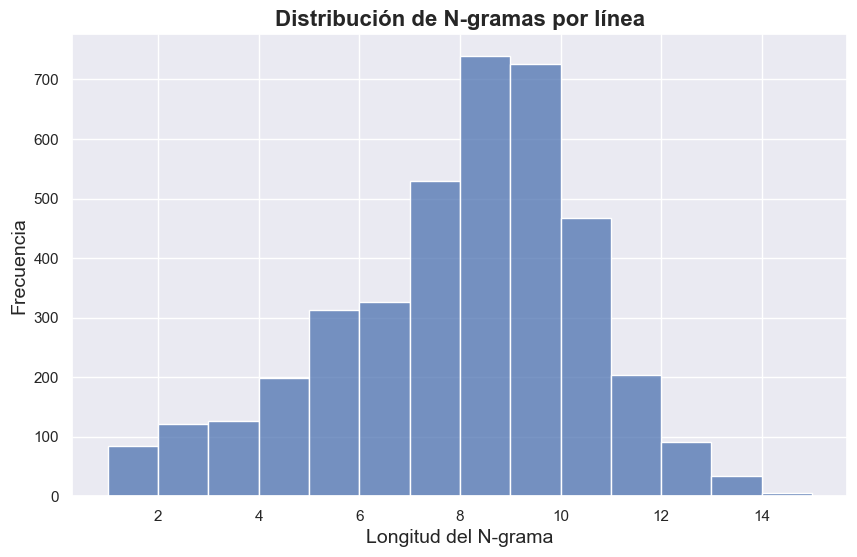

In [13]:
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style='darkgrid')

# Crear el histograma
plt.figure(figsize=(10,6))
sns.histplot(ngram_by_sentence, bins=range(1, max(ngram_by_sentence)+2), kde=False)

# Añadir títulos y etiquetas
plt.title('Distribución de N-gramas por línea', fontsize=16, fontweight='bold')
plt.xlabel('Longitud del N-grama', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el histograma
plt.show()

Definimos el tamaño máximo de contexto:

In [14]:
max_context_size = int(np.percentile(ngram_by_sentence, 90)-1)  # Restamos 1 porque el último token será el target
print(f'max_context_size: {max_context_size}')

max_context_size: 9


### 4. Train/Validation/Test split

In [15]:
from sklearn.model_selection import train_test_split

# Definimos fracciones para train/validation/test
val_size = 0.20
test_size = 0.01                        # Lo mantengo bajo ya que no lo voy a usar
train_size = 1 - (val_size + test_size)

rnd_seed = 42
# Generamos los sets
sequences_train_val, sequences_test, _, _, = train_test_split(input_sequences,
                                                input_sequences,
                                                test_size = test_size,
                                                random_state = rnd_seed)

sequences_train, sequences_val, _, _, = train_test_split(sequences_train_val,
                                                        sequences_train_val,
                                                        test_size = val_size / (train_size + val_size),
                                                        random_state = rnd_seed)

# Calculamos la cantidad de elementos de cada set
ntrain = len(sequences_train)
nval = len(sequences_val)
ntest = len(sequences_test)

print("Dimension del set de train:", ntrain)
print("Dimension del set de validation:", nval)
print("Dimension del set de test:", ntest)
print("")
print(f"Fracción de datos de train: {train_size:.2f}")
print(f"Fracción de datos de validation: {val_size:.2f}")
print(f"Fracción de datos de test: {test_size:.2f}")

Dimension del set de train: 3132
Dimension del set de validation: 794
Dimension del set de test: 40

Fracción de datos de train: 0.79
Fracción de datos de validation: 0.20
Fracción de datos de test: 0.01


Sobre el set de entrenamiento, adicionalmente, spliteamos las líneas que tienen mayor tamaño al contexto máximo definido y hacemos data augmentation generando secuencias más pequeñas.

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences_train_augm = []

for seq in sequences_train:

  # si la secuencia tiene más términos que el tamaño de contexto máximo,
  # armo varias sub-secuencias de tamaño máximo
  extra_seq = []
  if len(seq) > (max_context_size+1):
    extra = len(seq)-(max_context_size+1) + 1
    for i in range(extra):
      extra_seq.append(seq[i:i+max_context_size+1])
  else: # si la secuencia tiene menos términos el tamaño de contexto máximo, dejo la secuencia como está
      extra_seq.append(seq)
  
  for seq in extra_seq:
    subseq = [seq[:i+2] for i in range(len(seq)-1)]                                                 # Generamos todas las sub-secuencias
    sequences_train_augm.append(pad_sequences(subseq, maxlen=max_context_size+1, padding='pre'))    # Paddeamos al tamaño de contexto máximo

sequences_train_augm = np.concatenate(sequences_train_augm, axis=0)
ntrain_augm = len(sequences_train_augm) 
print("Dimension del set de train:", ntrain_augm)
print(f"Incremento del set de training: x{ntrain_augm / ntrain:.2f}")

Dimension del set de train: 23465
Incremento del set de training: x7.49


In [17]:
sequences_train_augm[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    2,   47],
       [   0,    0,    0,    0,    0,    0,    0,    2,   47,   14],
       [   0,    0,    0,    0,    0,    0,    2,   47,   14, 1765],
       [   0,    0,    0,    0,    0,    2,   47,   14, 1765,    1],
       [   0,    0,    0,    0,    2,   47,   14, 1765,    1, 3817],
       [   0,    0,    0,    2,   47,   14, 1765,    1, 3817,   35],
       [   0,    0,    2,   47,   14, 1765,    1, 3817,   35,    1],
       [   0,    2,   47,   14, 1765,    1, 3817,   35,    1, 3818],
       [   0,    0,    0,    0,    0,    0,    0,    0,    2, 2717],
       [   0,    0,    0,    0,    0,    0,    0,    2, 2717,    1]])

In [18]:
sequences_train_augm.shape

(23465, 10)

In [19]:
X_train = sequences_train_augm[:,:-1]
y_train = sequences_train_augm[:,-1]

Padeamos el set de validation y lo dejamos preparado

In [20]:
sequences_val_pad = []

for seq in sequences_val:
    subseq = [seq[:i+2] for i in range(len(seq)-1)]                                                 # Generamos todas las sub-secuencias
    sequences_val_pad.append(pad_sequences(subseq, maxlen=max_context_size+1, padding='pre'))       # Paddeamos al tamaño de contexto máximo

sequences_val_pad = np.concatenate(sequences_val_pad, axis=0)

X_val = sequences_val_pad[:,:-1]
y_val = sequences_val_pad[:,-1]

### 5. Modelo #1

In [21]:
from types import SimpleNamespace

cfg = SimpleNamespace(**{})

In [22]:
import random
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(rnd_seed)

#### 5.1 Arquitectura

Utilizamos una arquitectura básica EMBEDDING + LSTM + DENSE

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

cfg.embedding_dim = 300
cfg.lstm_units = 150

model = Sequential()
model.add(Embedding(input_dim =total_words + 1, output_dim = cfg.embedding_dim, input_shape=(max_context_size,)))   # Se agrega "+1" para incluir el índice 0 para padding.
model.add(LSTM(cfg.lstm_units, return_sequences=False))

# Predicción de clasificación con softmax
model.add(Dense(total_words + 1, activation='softmax'))     # Se agrega "+1" para incluir el índice 0 para padding.

model.summary()

c:\Users\badesia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 9, 300)         │     1,445,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       270,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4819)           │       727,669 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,443,969 (9.32 MB)

 Trainable params: 2,443,969 (9.32 MB)

 Non-trainable params: 0 (0.00 B)

#### 5.2. Entrenamiento

In [24]:
class PplCallback(keras.callbacks.Callback):

    '''
    Este callback es una solución ad-hoc para calcular al final de cada epoch de
    entrenamiento la métrica de Perplejidad sobre un conjunto de datos de validación.
    La perplejidad es una métrica cuantitativa para evaluar la calidad de la generación de secuencias.
    '''

    def __init__(self, val_data):
      # El callback lo inicializamos con secuencias de validación sobre las cuales
      # mediremos la perplejidad
      self.val_data = val_data

      self.target = []
      self.padded = []

      count = 0
      self.info = []

      # nos movemos en todas las secuencias de los datos de validación
      for seq in self.val_data:

        len_seq = len(seq)
        # armamos todas las subsecuencias
        subseq = [seq[:i] for i in range(1, len_seq + 1)]
        self.target.extend([seq[i] for i in range(len_seq)])
        self.padded.append(pad_sequences(subseq, maxlen=max_context_size, padding='pre'))

        self.info.append((count,count+len_seq))
        count += len_seq

      self.padded = np.vstack(self.padded)


    def on_epoch_end(self, epoch, logs=None):

        # en `scores` iremos guardando la perplejidad de cada secuencia
        scores = []

        predictions = self.model.predict(self.padded,verbose=0)

        # para cada secuencia de validación
        for start,end in self.info:

          # en `probs` iremos guardando las probabilidades de los términos target
          epsilon = 1e-8
          probs = [predictions[idx_seq, idx_vocab] + epsilon for idx_seq, idx_vocab in zip(range(start, end), self.target[start:end])]

          # calculamos la perplejidad por medio de logaritmos
          scores.append(np.exp(-np.sum(np.log(probs))/(end-start)))

        # promediamos todos los scores e imprimimos el valor promedio
        mean_scores = np.mean(scores)
        if mean_scores > 10:
          print(f'\n mean perplexity: {np.mean(scores):.1f} \n')
        elif mean_scores > 1:
          print(f'\n mean perplexity: {np.mean(scores):.2f} \n')
        else:
          print(f'\n mean perplexity: {np.mean(scores):.3f} \n')

Epoch 1/50
731/734 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0330 - loss: 6.9637
 mean perplexity: 4249.6 

734/734 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0330 - loss: 6.9625 - val_accuracy: 0.0438 - val_loss: 6.7874
Epoch 2/50
729/734 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0491 - loss: 6.1589
 mean perplexity: 8526.1 

734/734 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0491 - loss: 6.1590 - val_accuracy: 0.0632 - val_loss: 6.7936
Epoch 3/50
727/734 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0706 - loss: 5.8128
 mean perplexity: 20319.4 

734/734 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0707 - loss: 5.8122 - val_accuracy: 0.0773 - val_loss: 6.8693
Epoch 4/50
727/734 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0951 - loss: 5.4263
 mean perplexity: 38761.9 

734/734 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0951 - loss: 5.4255 - val_accuracy: 0.0789 - val_loss: 7.0008
Epoch 5/50
730/734 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1159 - loss:

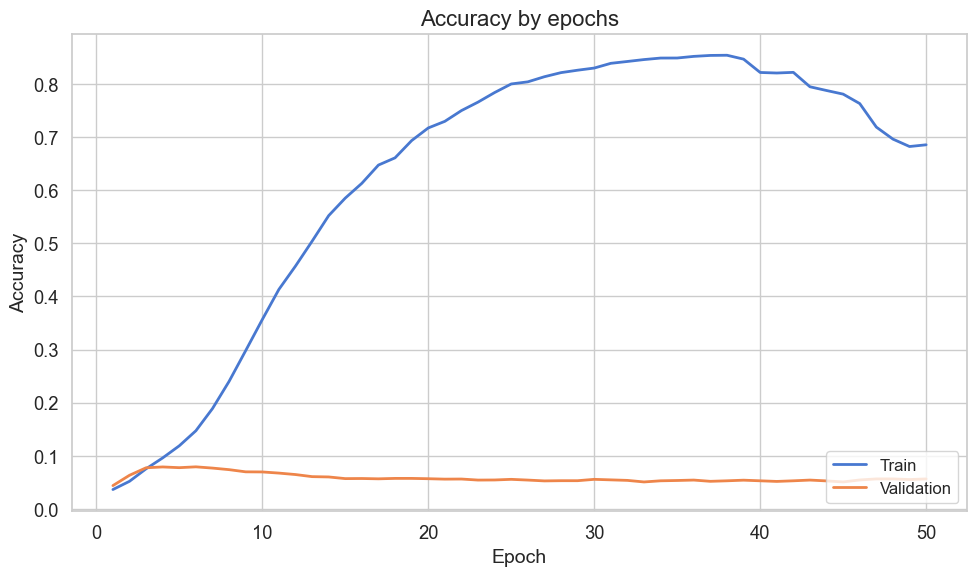

In [25]:
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model

cfg.epochs = 50
cfg.batch_size = 32
cfg.lr = 1e-3

lr_schedule = CosineDecay(
        initial_learning_rate=cfg.lr,
        decay_steps=np.ceil(ntrain_augm / cfg.batch_size) * cfg.epochs,
        alpha=1e-4
    )

optimizer = Adam(learning_rate=lr_schedule)

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10,
                           verbose=1, 
                           restore_best_weights=True)

# Compilamos el modelo
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-1.h5'

if os.path.exists(filename):
    # Load existing model
    model = load_model(filename)    
else:   
    # Train the model
    history = model.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ],
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Train', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validation', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**OBSERVACIONES:**

- Se observa que la perfomance sobre el set de validation alcanza un plafón en las primeras épocas a un valor de accuracy bajo (aprox. 0.08). Comparando con el accuracy del set de training, vemos como este último va mejorando con las épocas hasta alcanzar valores del orden de 0.85, donde luego comienza a descender.

- La diferencia marcable de perfomance entre train/validation puede deberse a over-fitting, por lo cual, a los efectos de buscar una mejor generalización del modelo, planteamos agregar en el siguiente modelo una o varias capas de Dropout.

- No se utilizó early-stopping porque usando el 'val_loss' como criterio, se disparaba tempranamente y no nos permitía evaluar la evolución del set de training para tomar medidas.

- Se observa que la perplexity sobre el set de validation se incrementa con las épocas inicialmente, hasta estabilizarse en un valor alto, denonanto la incapacidad del modelo para disernir correctamente cual es la siguiente palabra de la secuencia.

### 6. Modelo #2

#### 6.1. Arquitectura

Agregamos capas de Dropout para ver si logramos que el modelo generalicé mejor.

In [28]:
from keras.layers import Dropout

cfg.fc_units = 32
cfg.dropout = 0.20

model2 = Sequential()
model2.add(Embedding(input_dim =total_words + 1, output_dim = cfg.embedding_dim, input_shape=(max_context_size,)))
model2.add(LSTM(cfg.lstm_units, return_sequences=True))
model2.add(Dropout(cfg.dropout))
model2.add(LSTM(cfg.lstm_units)) # La última capa LSTM no lleva return_sequences
model2.add(Dropout(cfg.dropout))
model2.add(Dense(cfg.fc_units, activation='relu'))

# Predicción de clasificación con softmax
model2.add(Dense(total_words + 1, activation='softmax'))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 9, 300)         │     1,445,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 9, 150)         │       270,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 150)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4819)           │       159,027 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,060,759 (7.86 MB)

 Trainable params: 2,060,759 (7.86 MB)

 Non-trainable params: 0 (0.00 B)

#### 6.2. Entrenamiento

Epoch 1/50
731/734 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0303 - loss: 7.0022
 mean perplexity: 3582.4 

734/734 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0303 - loss: 7.0010 - val_accuracy: 0.0345 - val_loss: 6.7751
Epoch 2/50
730/734 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0355 - loss: 6.2489
 mean perplexity: 11711.4 

734/734 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0355 - loss: 6.2492 - val_accuracy: 0.0345 - val_loss: 7.0549
Epoch 3/50
729/734 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0354 - loss: 6.1052
 mean perplexity: 40138.1 

734/734 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0354 - loss: 6.1055 - val_accuracy: 0.0367 - val_loss: 7.3241
Epoch 4/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0397 - loss: 6.0300
 mean perplexity: 72856.2 

734/734 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0397 - loss: 6.0300 - val_accuracy: 0.0373 - val_loss: 7.4131
Epoch 5/50
729/734 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0447 -

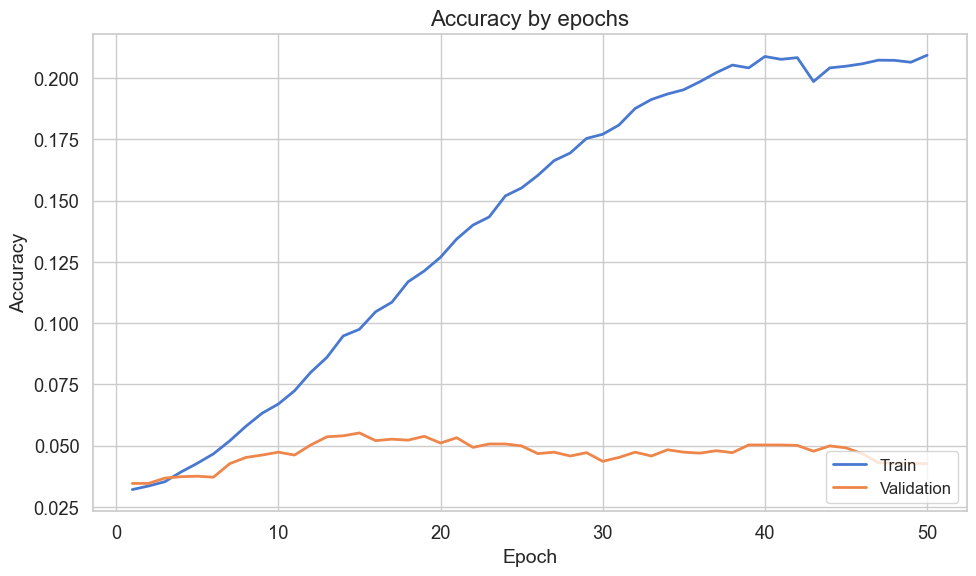

In [30]:
# Reiniciamos el optimizador
optimizer = Adam(learning_rate=lr_schedule)

# Compilamos el modelo
model2.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-2.h5'

if os.path.exists(filename):
    # Load existing model
    model2 = load_model(filename)    
else:   
    # Train the model
    history = model2.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ], 
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model2.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Train', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validation', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**OBSERVACIONES:**

- No se observa una mejora en la perfomance frente a secuencias no vistas.

- El accuracy del train decrece para la misma cantidad de épocas, como era de esperarse por el Dropout.

- El accuracy entre train/validation se niveló hacia abajo.

- Mismas observaciones sobre la perplexity.

### 7. Modelo #3

#### 7.1 Arquitectura

Usamos la misma arquitectura que el caso anterior, pero aplicamos Bidirectional en las capas LSTM para entender tanto hacia adelante como hacia atrás.

In [ ]:
from keras.layers import Bidirectional

cfg.lstm_units = 150

model3 = Sequential()
model3.add(Embedding(input_dim =total_words + 1, output_dim = cfg.embedding_dim, input_shape=(max_context_size,)))
model3.add(Bidirectional(LSTM(cfg.lstm_units, return_sequences=True)))
model3.add(Dropout(cfg.dropout))
model3.add(LSTM(cfg.lstm_units)) # La última capa LSTM no lleva return_sequences
model3.add(Dropout(cfg.dropout))
model3.add(Dense(cfg.fc_units, activation='relu'))

# Predicción de clasificación con softmax
model3.add(Dense(total_words + 1, activation='softmax'))

model3.summary()

c:\Users\badesia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 9, 300)         │     1,445,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 9, 300)         │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 9, 300)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 150)            │       270,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4819)           │       159,027 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,421,359 (9.24 MB)

 Trainable params: 2,421,359 (9.24 MB)

 Non-trainable params: 0 (0.00 B)

#### 7.2 Entrenamiento

Epoch 1/50
730/734 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0326 - loss: 6.9930
 mean perplexity: 3204.1 

734/734 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.0326 - loss: 6.9913 - val_accuracy: 0.0345 - val_loss: 6.7141
Epoch 2/50
732/734 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0345 - loss: 6.2178
 mean perplexity: 5637.8 

734/734 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0345 - loss: 6.2178 - val_accuracy: 0.0345 - val_loss: 6.9242
Epoch 3/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0403 - loss: 6.0982
 mean perplexity: 22546.8 

734/734 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0403 - loss: 6.0981 - val_accuracy: 0.0446 - val_loss: 7.0069
Epoch 4/50
730/734 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0494 - loss: 5.9296
 mean perplexity: 23478.4 

734/734 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0494 - loss: 5.9296 - val_accuracy: 0.0497 - val_loss: 7.0208
Epoch 5/50
732/734 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.

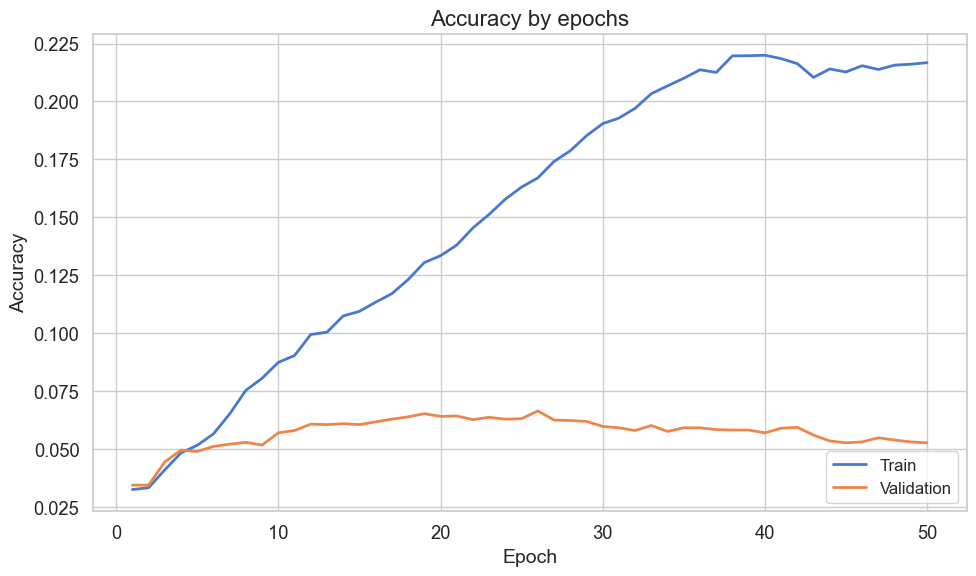

In [ ]:
# Reiniciamos el optimizador
optimizer = Adam(learning_rate=lr_schedule)

# Compilamos el modelo
model3.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-3.h5'

if os.path.exists(filename):
    # Load existing model
    model3 = load_model(filename)    
else:   
    # Train the model
    history = model3.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ], 
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model3.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Train', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validation', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 8. Modelo #4

#### 8.1 Arquitectura

Usamos la misma arquitectura, pero con Layer Normalization.

In [35]:
from keras.layers import LayerNormalization, BatchNormalization, Activation

model4 = Sequential()
model4.add(Embedding(input_dim=total_words + 1, output_dim=cfg.embedding_dim, input_shape=(max_context_size,)))
model4.add(Bidirectional(LSTM(cfg.lstm_units, return_sequences=True)))
model4.add(LayerNormalization())                                        
model4.add(Dropout(cfg.dropout))
model4.add(LSTM(cfg.lstm_units))
model4.add(LayerNormalization())
model4.add(Dropout(cfg.dropout))
model4.add(Dense(cfg.fc_units))
model4.add(BatchNormalization())
model4.add(Activation('relu'))

model4.add(Dense(total_words + 1, activation='softmax'))

model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 9, 300)         │     1,445,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 9, 300)         │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 9, 300)         │           600 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 9, 300)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 150)            │       270,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 150)            │           300 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4819)           │       159,027 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,387 (9.24 MB)

 Trainable params: 2,422,323 (9.24 MB)

 Non-trainable params: 64 (256.00 B)

#### 8.2 Entrenamiento

Epoch 1/50
733/734 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2149 - loss: 3.9939
 mean perplexity: 2867568.7 

734/734 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2148 - loss: 3.9944 - val_accuracy: 0.0569 - val_loss: 11.0110
Epoch 2/50
729/734 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2095 - loss: 3.8578
 mean perplexity: 3212862.6 

734/734 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2094 - loss: 3.8591 - val_accuracy: 0.0548 - val_loss: 11.7611
Epoch 3/50
731/734 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2126 - loss: 3.8032
 mean perplexity: 3372738.6 

734/734 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2125 - loss: 3.8038 - val_accuracy: 0.0567 - val_loss: 12.2403
Epoch 4/50
733/734 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2222 - loss: 3.7352
 mean perplexity: 3669993.4 

734/734 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2222 - loss: 3.7356 - val_accuracy: 0.0544 - val_loss: 12.7521
Epoch 5/50
732/734 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

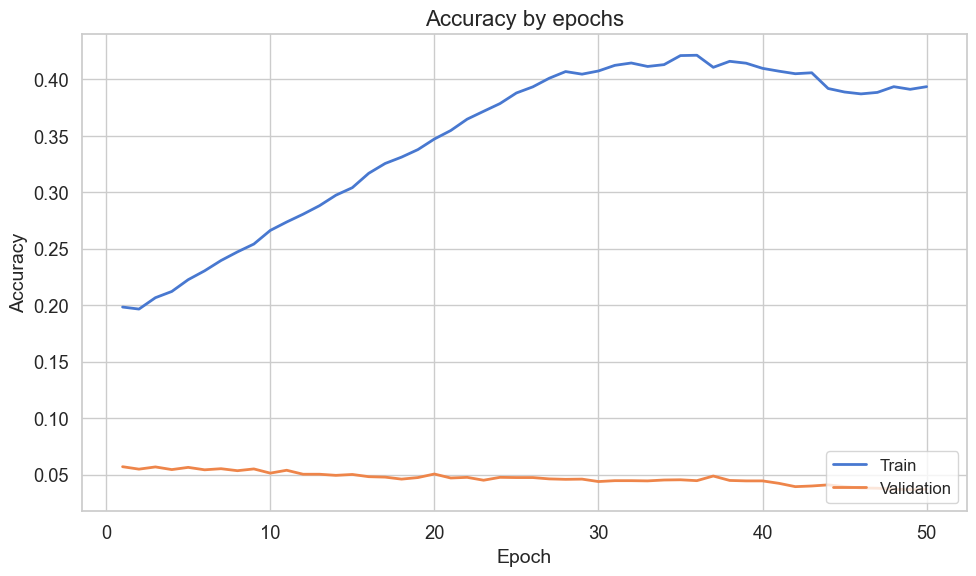

In [37]:
# Reiniciamos el optimizador
optimizer = Adam(learning_rate=lr_schedule)

# Compilamos el modelo
model4.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-4.h5'

if os.path.exists(filename):
    # Load existing model
    model4 = load_model(filename)    
else:   
    # Train the model
    history = model4.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ], 
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model4.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Train', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validation', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 9. Modelo #5

Tomamos la arquitectura del modelo #3 pero sin los Dropouts.

#### 9.1 Arquitectura

In [41]:
model5 = Sequential()
model5.add(Embedding(input_dim =total_words + 1, output_dim = cfg.embedding_dim, input_shape=(max_context_size,)))
model5.add(Bidirectional(LSTM(cfg.lstm_units, return_sequences=True)))
model5.add(Bidirectional(LSTM(cfg.lstm_units))) # La última capa LSTM no lleva return_sequences
model5.add(Dense(cfg.fc_units, activation='relu'))

# Predicción de clasificación con softmax
model5.add(Dense(total_words + 1, activation='softmax'))

model5.summary()

c:\Users\badesia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 9, 300)         │     1,445,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 9, 300)         │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 300)            │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4819)           │       159,027 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,696,759 (10.29 MB)

 Trainable params: 2,696,759 (10.29 MB)

 Non-trainable params: 0 (0.00 B)

#### 9.2 Entrenamiento

Epoch 1/50
730/734 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0297 - loss: 6.9928
 mean perplexity: 6862.0 

734/734 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.0298 - loss: 6.9913 - val_accuracy: 0.0345 - val_loss: 6.8382
Epoch 2/50
731/734 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0355 - loss: 6.2613
 mean perplexity: 12161.3 

734/734 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.0355 - loss: 6.2615 - val_accuracy: 0.0345 - val_loss: 6.9803
Epoch 3/50
733/734 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0384 - loss: 6.1648
 mean perplexity: 41968.5 

734/734 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0384 - loss: 6.1648 - val_accuracy: 0.0440 - val_loss: 7.0426
Epoch 4/50
731/734 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0482 - loss: 6.0125
 mean perplexity: 111050.2 

734/734 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0482 - loss: 6.0126 - val_accuracy: 0.0508 - val_loss: 7.0838
Epoch 5/50
733/734 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy:

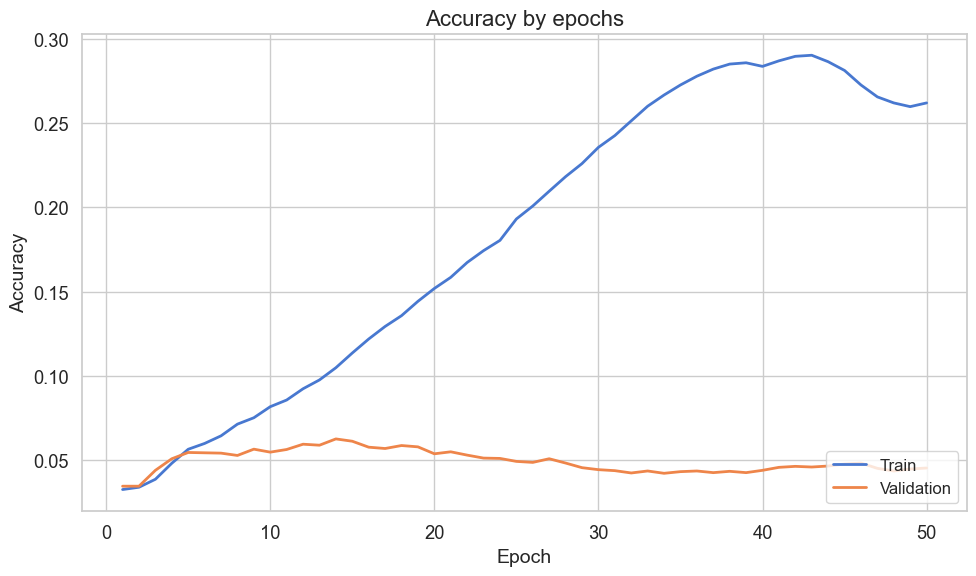

In [42]:
# Reiniciamos el optimizador
optimizer = Adam(learning_rate=lr_schedule)

# Compilamos el modelo
model5.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-5.h5'

if os.path.exists(filename):
    # Load existing model
    model5 = load_model(filename)    
else:   
    # Train the model
    history = model5.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ], 
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model5.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Train', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validation', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 9. Predicción próxima palabra

In [45]:
def predict_next_word(input_text, model, tokenizer, max_context_size):
  token_list = tokenizer.texts_to_sequences([input_text])[0]    # Encodeamos
  if len(token_list) >= max_context_size:
    token_list = token_list[-(max_context_size):]
  token_list = pad_sequences([token_list],maxlen=max_context_size-1,padding='pre')  # Padeamos
  
  predicted = model.predict(token_list,verbose=0)
  predicted_word_index = np.argmax(predicted, axis=1)
  for word,index in tokenizer.word_index.items():
    if index == predicted_word_index:
      return word
  return None

In [48]:
inputs = ["Taken to", 'My name is', 'to be or']

bestmodel = model          # No se observan grandes diferencias de perfomance entre los diferentes modelos. Tomamos el #1 como referencia.

for input_text in inputs:
    print(f"Input text: {input_text}")
    max_sequence_length=bestmodel.input_shape[1]+1
    next_word = predict_next_word(input_text, bestmodel, tokenizer, max_context_size)
    print(f"Next word: {next_word}")
    print("")

Input text: Taken to
Next word: shew

Input text: My name is
Next word: the

Input text: to be or
Next word: if



Como era de esperarse por el bajo accuracy en el validation set, las predicciones no son muy coherentes con el texto que las precede.

### 10. Generación de secuencias

In [49]:
def generate_seq(model, tokenizer, seed_text, max_length, n_words, temperature = 1.0):
    """
        Exec model sequence prediction

        Args:
            model (keras): modelo entrenado
            tokenizer (keras tokenizer): tonenizer utilizado en el preprocesamiento
            seed_text (string): texto de entrada (input_seq)
            max_length (int): máxima longitud de la sequencia de entrada
            n_words (int): números de palabras a agregar a la sequencia de entrada
            temperature (float): contrala la aleatoriedad. temp < 1 -> Aumenta determinismo / temp > 1 -> Aumenta aleatoriedad
        returns:
            output_text (string): sentencia con las "n_words" agregadas
    """
    output_text = seed_text
	# generate a fixed number of words
    for _ in range(n_words):

        encoded = tokenizer.texts_to_sequences([output_text])[0]                		# Encodeamos
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')		    # Padeamos (just in case)

        preds = model.predict(encoded)[0]       # Predicción softmax
        
        # Ajustar probabilidades con temperatura
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        
        # Muestrear la siguiente palabra
        next_index = np.random.choice(len(preds), p=preds)
        
        # Buscar la palabra correspondiente
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                out_word = word
                break

        # Añadir la palabra al texto generado
        output_text += ' ' + out_word

    return output_text

In [52]:
input_text='to be or'

temperatures = [0.5, 1, 10]

for temp in temperatures:
    print(generate_seq(model, tokenizer, input_text, max_length=max_context_size, n_words=10, temperature = temp))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
to be or if your minde be any good good vowes were lord
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
to be or if your minde dislike any thing obey i will forestall
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━

Las secuencias obtenidas no tienen mucho sentido, en sitonía con la baja perfomance sobre el validation set.

#### 10.1 Beam search approach

In [53]:
# funcionalidades para hacer encoding y decoding

def encode(text,max_length=max_context_size):

    encoded = tokenizer.texts_to_sequences([text])[0]
    encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')

    return encoded

def decode(seq):
    return tokenizer.sequences_to_texts([seq])

In [ ]:
from scipy.special import softmax

# Función para seleccionar candidatos con muestreo y temperatura
def select_candidates(preds, num_beams, vocab_size, history_probs, history_tokens, max_context_size, temp=1.0):
    pred_large = []

    for idx, pp in enumerate(preds):
        # Suma log(probabilidades) + historial acumulado
        pred_large.extend(np.log(pp + 1e-10) + history_probs[idx])

    pred_large = np.array(pred_large)
    # Probabilidades ajustadas con temperatura
    probs = softmax(pred_large / temp)
    # Muestreo sin reemplazo
    idx_select = np.random.choice(np.arange(pred_large.shape[0]), size=num_beams, replace=False, p=probs)

    new_history_tokens = []
    for idx in idx_select:
        prev_seq = list(history_tokens[idx // vocab_size])  # secuencia previa
        token = idx % vocab_size                            # token predicho
        prev_seq.append(token)
        # Mantener la longitud del contexto
        prev_seq = prev_seq[-max_context_size:]
        new_history_tokens.append(prev_seq)

    new_history_tokens = np.array(new_history_tokens)
    return pred_large[idx_select], new_history_tokens

def beam_search_seq(model, seed_text, max_length, n_words, num_beams=3, temperature=1.0):
    encoded = encode(seed_text, max_length)
    vocab_size = model.output_shape[-1]

    # Estado inicial
    history_probs = [0.0] * num_beams
    history_tokens = [encoded[0].tolist()] * num_beams

    # Primera predicción
    pred = np.squeeze(model.predict(encoded))
    if pred.ndim == 0:
        pred = np.array([pred])  # asegurar array unidimensional
    _, history_tokens = select_candidates([pred], num_beams, vocab_size, history_probs, history_tokens, max_context_size, temp=temperature)

    # Generar palabras posteriores
    for _ in range(n_words - 1):
        preds = []
        for seq in history_tokens:
            input_seq = pad_sequences([seq], maxlen=max_length, padding='pre')
            pred = np.squeeze(model.predict(input_seq))
            if pred.ndim == 0:
                pred = np.array([pred])
            preds.append(pred)

        _, history_tokens = select_candidates(preds, num_beams, vocab_size, history_probs, history_tokens, max_context_size, temp=temperature)

    # La mejor secuencia final
    final_sequence_tokens = history_tokens[0]
    output_text = decode(final_sequence_tokens)
    return output_text

In [69]:
results = []
for temp in temperatures:
    results.append(beam_search_seq(model, input_text, max_length=max_context_size, n_words=10, temperature = temp))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [81]:
for text in results:
    full_text = input_text + ' ' + text[0]
    print(full_text)

to be or his father and me thinkes i doe not goe
to be or thou prate of heauen within night kinde mad offended
to be or k they till somthing hey come any quietly eternity


Las secuencias obtenidas no tienen mucho sentido. Se debe mejorar.

### 11. CONCLUSIONES

- Se implementaron manualmente diferentes arquitecturas de RNN para predicción de la siguiente palabra.

- Si bien se observó una buena performance en el set de train, no así en el set de validation, dando cuenta de una situación de sobre-ajuste.

- Se implementaron medidas para mejorar la generalización del modelo, sin grandes resultados.

- Se concluye que la falta de generalización puede deberse al tamaño relativamente chico del dataset lo cual hace que la red aprenda un número limitado de secuencias.

- Se podría mejorar aumentando el tamaño del embedding.